<a href="https://colab.research.google.com/github/MINUUUUUUUUUUUU/Data_Science_Term_Project/blob/main/DataScienceTermProject_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


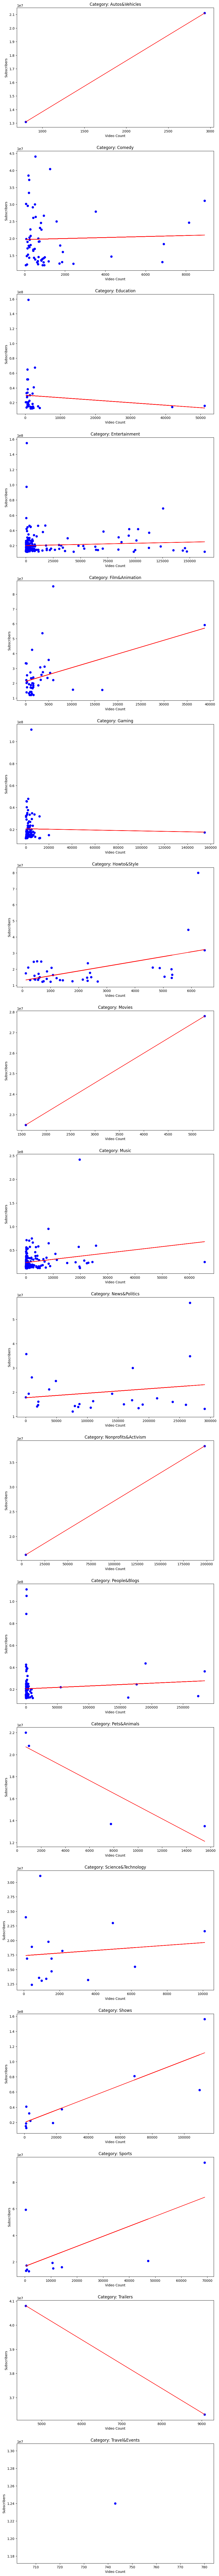

In [15]:
###각 카테고리별로 구독자 수 - 올린 영상 수의 회귀 분석 결과

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# K-Fold Cross Validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

df = pd.read_csv("/content/drive/MyDrive/ds_remove0.csv")

# 필요한 열 선택
df_selected = df[["subscribers", "video_count", "category"]]
grouped = df_selected.groupby("category")

# 그래프 설정
fig, axs = plt.subplots(len(grouped), figsize=(10, 6 * len(grouped)))
fig.tight_layout(pad=5)

# 각 카테고리별로 회귀 분석 및 그래프 그리기
for i, (category, group) in enumerate(grouped):
    X = group[["video_count"]]
    y = group["subscribers"]

    # 모델 학습
    model = LinearRegression()
    model.fit(X, y)

    # 회귀 직선 그리기
    axs[i].scatter(group["video_count"], group["subscribers"], color='blue')
    axs[i].plot(group["video_count"], model.predict(X), color='red')

    axs[i].set_xlabel("Video Count")
    axs[i].set_ylabel("Subscribers")
    axs[i].set_title(f"Category: {category}")

plt.show()

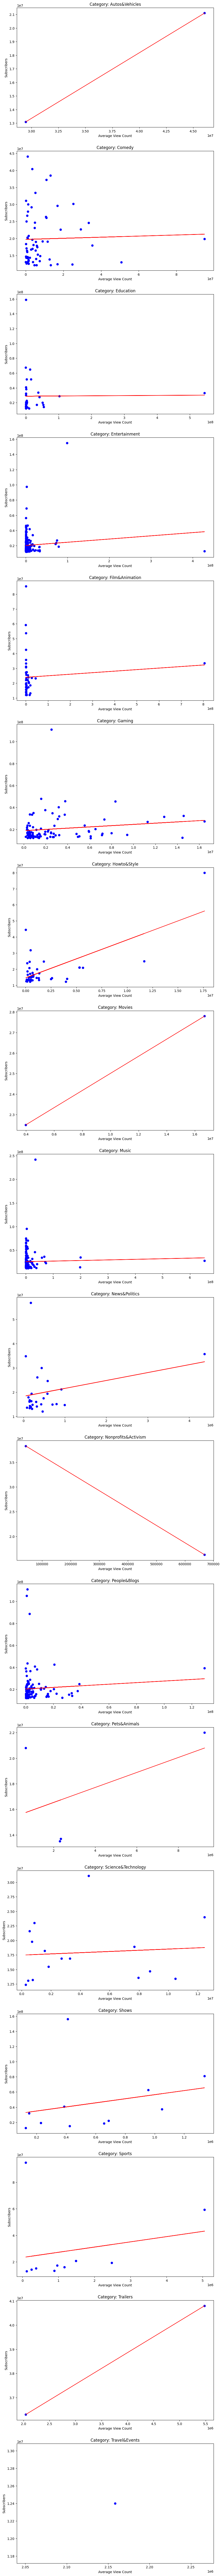

In [16]:
###각 카테고리별로 구독자 수 - 최근 영상 10개의 조회 수의 회귀 분석 결과

df_selected = df[["subscribers", "view_mean", "category"]]

# 카테고리별로 데이터 그룹화
grouped = df_selected.groupby("category")

fig, axs = plt.subplots(len(grouped), figsize=(10, 6 * len(grouped)))
fig.tight_layout(pad=5)

for i, (category, group) in enumerate(grouped):
    X = group[["view_mean"]]
    y = group["subscribers"]

    # 모델 학습
    model = LinearRegression()
    model.fit(X, y)

    # 회귀 직선 그리기
    axs[i].scatter(group["view_mean"], group["subscribers"], color='blue')
    axs[i].plot(group["view_mean"], model.predict(X), color='red')

    axs[i].set_xlabel("Average View Count")
    axs[i].set_ylabel("Subscribers")
    axs[i].set_title(f"Category: {category}")

plt.show()

In [19]:
###두 회귀 분석 결과에 대해서 상관관계

# 필요한 열 선택
df_selected = df[["subscribers", "video_count", "view_mean", "category"]]
grouped = df_selected.groupby("category")

# 데이터를 저장할 빈 리스트
results = []

# 각 카테고리별로 회귀 분석 및 그래프 그리기
for category, group in grouped:
    X_video = group[["video_count"]]
    y_subscribers = group["subscribers"]

    X_view = group[["view_mean"]]
    y_subscribers_copy = group["subscribers"].copy()

    # 회귀 분석 - 구독자 수와 올린 영상 수
    model_video = LinearRegression()
    model_video.fit(X_video, y_subscribers)
    video_predicted = model_video.predict(X_video)

    # # Add K-fold cross-validation for model_video
    # video_scores = cross_val_score(model_video, X_video, y_subscribers, cv=kfold)

    # 회귀 분석 - 구독자 수와 최근 영상 10개의 조회 수
    model_view = LinearRegression()
    model_view.fit(X_view, y_subscribers_copy)
    view_predicted = model_view.predict(X_view)

    # # Add K-fold cross-validation for model_view
    # view_scores = cross_val_score(model_view, X_view, y_subscribers_copy, cv=kfold)

    # 상관관계 계산
    correlation_video = group["subscribers"].corr(group["video_count"])
    correlation_view = group["subscribers"].corr(group["view_mean"])

    print(f"Category: {category}")
    print(f"Correlation - Video Count: {correlation_video:.2f}")
    print(f"Correlation - Average View Count: {correlation_view:.2f}")
    print(f"Average Cross-Validation Score - Video: {np.mean(video_scores):.2f}")
    print(f"Average Cross-Validation Score - View: {np.mean(view_scores):.2f}")
    print("-------------------------")

    # 결과를 딕셔너리 형태로
    result = {
        "Category": category,
        "Correlation_Video_Count": correlation_video,
        "Correlation_Average_View_Count": correlation_view,
        "Video_Intercept": model_video.intercept_,
        "Video_Coefficient": model_video.coef_[0],
        "View_Intercept": model_view.intercept_,
        "View_Coefficient": model_view.coef_[0],
        "Video_Score": np.mean(video_scores),   # Add score for video regression
        "View_Score": np.mean(view_scores)   # Add score for view regression
    }

    results.append(result)

# 결과를 CSV 파일로 저장

result_df = pd.DataFrame(results)
result_df.to_csv("regression_results.csv", index=False)
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Category: Autos&Vehicles
Correlation - Video Count: 1.00
Correlation - Average View Count: 1.00
Average Cross-Validation Score - Video: nan
Average Cross-Validation Score - View: nan
-------------------------
Category: Comedy
Correlation - Video Count: 0.04
Correlation - Average View Count: 0.03
Average Cross-Validation Score - Video: -30.85
Average Cross-Validation Score - View: -32.77
-------------------------
Category: Education
Correlation - Video Count: -0.14
Correlation - Average View Count: 0.01
Average Cross-Validation Score - Video: -1859.55
Average Cross-Validation Score - View: -106.01
-------------------------
Category: Entertainment
Correlation - Video Count: 0.07
Correlation - Average View Count: 0.10
Average Cross-Validation Score - Video: -51.42
Average Cross-Validation Score - View: -102.74
-------------------------
Category: Film&Animation
Correlation - Video Count: 0.42
Correlation - Average View Count: 0.09
Average Cross-Validation Score - Video: -16.41
Average Cros

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

Category: People&Blogs
Correlation - Video Count: 0.08
Correlation - Average View Count: 0.07
Average Cross-Validation Score - Video: -62.75
Average Cross-Validation Score - View: -63.01
-------------------------
Category: Pets&Animals
Correlation - Video Count: -0.90
Correlation - Average View Count: 0.50
Average Cross-Validation Score - Video: -117023.74
Average Cross-Validation Score - View: -3225.49
-------------------------
Category: Science&Technology
Correlation - Video Count: 0.12
Correlation - Average View Count: 0.08
Average Cross-Validation Score - Video: -16.53
Average Cross-Validation Score - View: -16.90
-------------------------
Category: Shows
Correlation - Video Count: 0.85
Correlation - Average View Count: 0.25
Average Cross-Validation Score - Video: -13.46
Average Cross-Validation Score - View: -120.30
-------------------------
Category: Sports
Correlation - Video Count: 0.66
Correlation - Average View Count: 0.22
Average Cross-Validation Score - Video: -97.22
Averag

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


ValueError: ignored